## [Slide Deck](https://docs.google.com/presentation/d/1Ad0i6LPm5B9zvE7wCYXDtf3xMuyg2Chb10dV7I5PHmM/edit?usp=sharing)

## Refresh from Last Time 

In [1]:
from keras.models import Sequential
from keras.datasets import fashion_mnist
from keras import utils

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
y_binary_train = utils.to_categorical(y_train)
y_binary_test = utils.to_categorical(y_test)

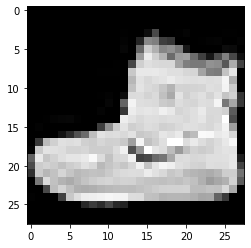

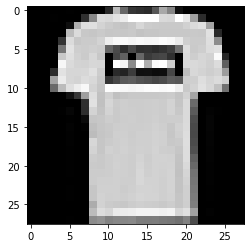

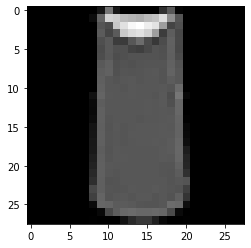

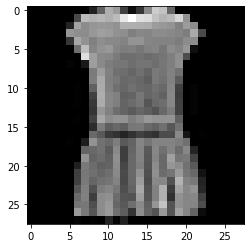

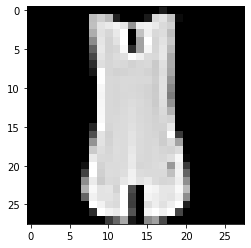

In [4]:
for i in range(5):
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [5]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [6]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation = 'relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation = 'relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation = 'relu'))
model_cnn.add(Dense(64, activation = 'relu'))
model_cnn.add(Dense(10, activation = 'softmax'))

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [7]:
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
%%time
training_results_cnn = model_cnn.fit(X_train.reshape(60000, 28, 28, 1), y_binary_train,
                               epochs=10, batch_size=128,
                               validation_data=(X_test.reshape(10000, 28, 28, 1), y_binary_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 355us/step - loss: 0.7048 - accuracy: 0.7869 - val_loss: 0.4512 - val_accuracy: 0.8444
Epoch 2/10
60000/60000 [==============================] - 21s 351us/step - loss: 0.3640 - accuracy: 0.8680 - val_loss: 0.3557 - val_accuracy: 0.8714
Epoch 3/10
60000/60000 [==============================] - 21s 347us/step - loss: 0.3106 - accuracy: 0.8882 - val_loss: 0.3198 - val_accuracy: 0.8856
Epoch 4/10
60000/60000 [==============================] - 21s 353us/step - loss: 0.2787 - accuracy: 0.8979 - val_loss: 0.3173 - val_accuracy: 0.8884
Epoch 5/10
60000/60000 [==============================] - 21s 353us/step - loss: 0.2570 - accuracy: 0.9046 - val_loss: 0.3104 - val_accuracy: 0.8864
Epoch 6/10
60000/60000 [==============================] - 21s 356us/step - loss: 0.2394 - accuracy: 0.9113 - val_loss: 0.2913 - val_accuracy: 0.8987
Epoch 7/10
60000/60000 [==============================] 

In [9]:
def visualize_loss(model_results):
    history = model_results.history
    training_loss_values = history['loss']
    val_loss_values = history['val_loss']

    epochs = range(1, len(training_loss_values) + 1)
    plt.plot(epochs, training_loss_values, 'g', label='Training Loss')
    plt.plot(epochs, val_loss_values, 'r', label='Val Loss')

    plt.title('Training vs Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def visualize_accuracy(model_results):
    history = model_results.history
    training_acc_values = history['accuracy']
    val_acc_values = history['val_accuracy']

    epochs = range(1, len(training_acc_values) + 1)
    plt.plot(epochs, training_acc_values, 'g', label='Training Accuracy')
    plt.plot(epochs, val_acc_values, 'r', label='Val Accuracy')

    plt.title('Training vs Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [10]:
plt.style.use('fivethirtyeight')

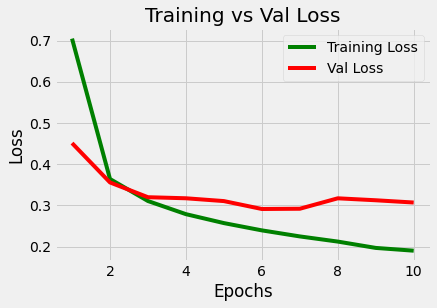

In [11]:
visualize_loss(training_results_cnn)

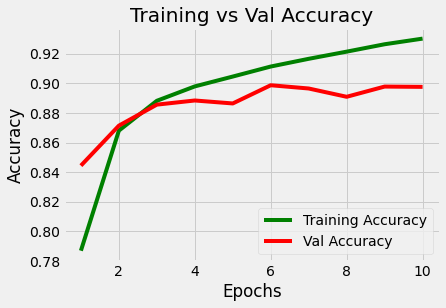

In [12]:
visualize_accuracy(training_results_cnn)

## Dropout 

In [13]:
from keras.layers import Dropout

In [14]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.2))
model_cnn.add(Conv2D(64, (3, 3), activation = 'relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation = 'relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation = 'relu'))
model_cnn.add(Dense(64, activation = 'relu'))
model_cnn.add(Dense(10, activation = 'softmax'))

model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)         

In [15]:
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
%%time
training_results_cnn_do = model_cnn.fit(X_train.reshape(60000, 28, 28, -1), y_binary_train,
                               epochs=10, batch_size=128,
                               validation_data=(X_test.reshape(10000, 28, 28, -1), y_binary_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 488us/step - loss: 0.9139 - accuracy: 0.7291 - val_loss: 0.4947 - val_accuracy: 0.8276
Epoch 2/10
60000/60000 [==============================] - 25s 417us/step - loss: 0.4443 - accuracy: 0.8378 - val_loss: 0.3997 - val_accuracy: 0.8581
Epoch 3/10
60000/60000 [==============================] - 28s 461us/step - loss: 0.3815 - accuracy: 0.8611 - val_loss: 0.3809 - val_accuracy: 0.8609
Epoch 4/10
60000/60000 [==============================] - 26s 433us/step - loss: 0.3453 - accuracy: 0.8743 - val_loss: 0.3492 - val_accuracy: 0.8742
Epoch 5/10
60000/60000 [==============================] - 26s 439us/step - loss: 0.3221 - accuracy: 0.8835 - val_loss: 0.3325 - val_accuracy: 0.8786
Epoch 6/10
60000/60000 [==============================] - 26s 435us/step - loss: 0.3038 - accuracy: 0.8871 - val_loss: 0.3222 - val_accuracy: 0.8829
Epoch 7/10
60000/60000 [==============================] 

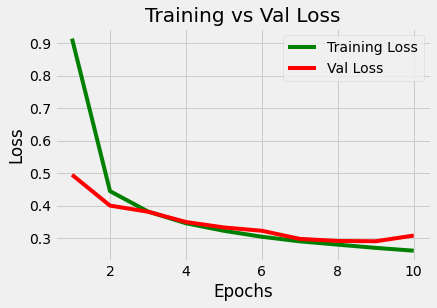

In [17]:
visualize_loss(training_results_cnn_do)

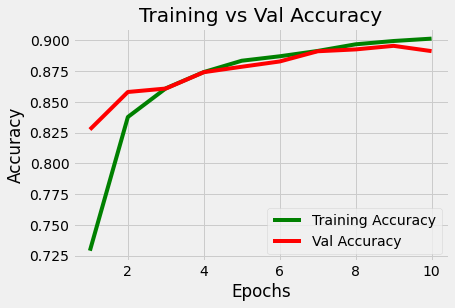

In [18]:
visualize_accuracy(training_results_cnn_do)

## Keras Callbacks 

In [19]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [20]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001, verbose=3),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [21]:
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
training_results_cnn_do = model_cnn.fit(X_train.reshape(60000, 28, 28, -1), y_binary_train,
                               epochs=100, batch_size=128,
                               validation_data=(X_test.reshape(10000, 28, 28, -1), y_binary_test),
                                       callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 26s 440us/step - loss: 0.2624 - accuracy: 0.9020 - val_loss: 0.2941 - val_accuracy: 0.8942
Epoch 2/100
60000/60000 [==============================] - 26s 427us/step - loss: 0.2509 - accuracy: 0.9059 - val_loss: 0.3025 - val_accuracy: 0.8891
Epoch 3/100
60000/60000 [==============================] - 26s 431us/step - loss: 0.2391 - accuracy: 0.9100 - val_loss: 0.2767 - val_accuracy: 0.8985
Epoch 4/100
60000/60000 [==============================] - 26s 441us/step - loss: 0.2368 - accuracy: 0.9103 - val_loss: 0.2665 - val_accuracy: 0.9021
Epoch 5/100
60000/60000 [==============================] - 26s 427us/step - loss: 0.2248 - accuracy: 0.9150 - val_loss: 0.2820 - val_accuracy: 0.8976
Epoch 6/100
60000/60000 [==============================] - 26s 428us/step - loss: 0.2195 - accuracy: 0.9171 - val_loss: 0.2855 - val_accuracy: 0.8931
Epoch 7/100
60000/60000 [=========================

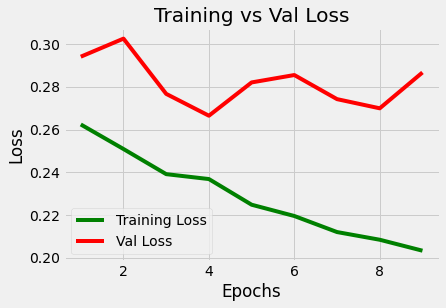

In [23]:
visualize_loss(training_results_cnn_do)

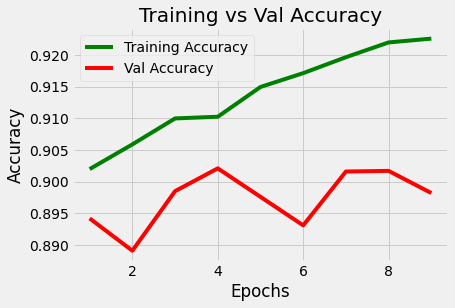

In [24]:
visualize_accuracy(training_results_cnn_do)

In [25]:
import keras 

model_load = keras.models.load_model('best_model.h5')

In [26]:
model_load.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)         

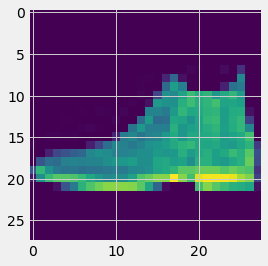

In [27]:
plt.imshow(X_test[0])

In [28]:
model_load.predict_classes(X_test[0].reshape(1, 28, 28, 1))

array([9])

## Transfer Learning 

In [30]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np

data_te = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'data/test',
    target_size=(224, 224),
    batch_size=4419,
    seed=123)

data_tr = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'data/train',
    target_size=(224, 224),
    batch_size=4419,
    seed=123)

Found 500 images belonging to 2 classes.
Found 498 images belonging to 2 classes.


Combine both datasets 

In [31]:
data_tr.class_indices

{'hot_dog': 0, 'not_hot_dog': 1}

In [32]:
#split images and labels
images_tr, labels_tr = next(data_tr)
images_te, labels_te = next(data_te)

In [33]:
images = np.concatenate((images_tr, images_te))
labels = np.concatenate((labels_tr[:,0], labels_te[:,0]))

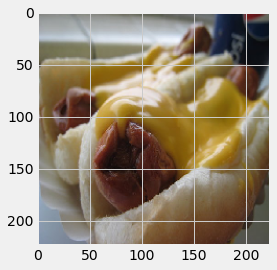

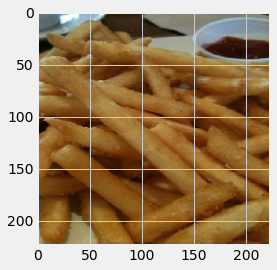

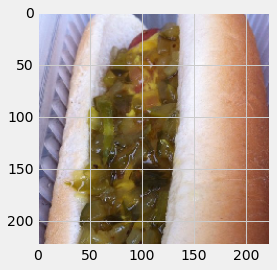

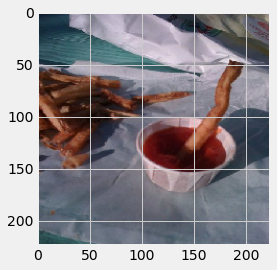

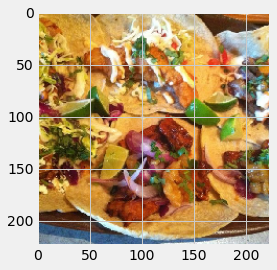

In [34]:
for i in range(5):
    plt.imshow(images[i])
    plt.show()

In [35]:
from sklearn.model_selection import train_test_split
X_model, X_test, y_model, y_test = train_test_split(images, labels, test_size=0.20, random_state=123)

In [36]:
cnn = Sequential()
cnn.add(Conv2D(64, (3, 3),
                      activation='relu',
                      input_shape=(224, 224,  3),
                      padding='SAME'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(32, (3, 3), activation='relu', padding='SAME'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Flatten())
cnn.add(Dense(32, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

cnn.compile(loss='binary_crossentropy',
            optimizer="adam",
            metrics=['accuracy'])
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 112, 112, 32)      18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                3211296   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [37]:
cnn1 = cnn.fit(X_model,
               y_model,
               epochs=5,
               batch_size=50,
               validation_data=(X_test, y_test))

Train on 798 samples, validate on 200 samples
Epoch 1/5
798/798 [==============================] - 38s 48ms/step - loss: 1.0312 - accuracy: 0.4987 - val_loss: 0.6906 - val_accuracy: 0.5900
Epoch 2/5
798/798 [==============================] - 34s 42ms/step - loss: 0.6892 - accuracy: 0.5777 - val_loss: 0.6845 - val_accuracy: 0.6200
Epoch 3/5
798/798 [==============================] - 33s 42ms/step - loss: 0.6734 - accuracy: 0.5965 - val_loss: 0.7006 - val_accuracy: 0.5000
Epoch 4/5
798/798 [==============================] - 35s 44ms/step - loss: 0.6329 - accuracy: 0.6316 - val_loss: 0.6611 - val_accuracy: 0.6300
Epoch 5/5
798/798 [==============================] - 34s 43ms/step - loss: 0.5320 - accuracy: 0.7657 - val_loss: 0.6945 - val_accuracy: 0.5600


In [38]:
from keras.applications import InceptionV3
from keras.layers import GlobalAveragePooling2D

In [39]:
imagenet = InceptionV3(weights='imagenet', include_top=False)
imagenet_new = imagenet.output
new_model = Sequential()
new_model.add(imagenet)
new_model.add(GlobalAveragePooling2D())
new_model.add(Dense(1024, activation='relu'))
new_model.add(Dense(1024, activation='relu'))  # dense layer 2
new_model.add(Dense(512, activation='relu'))  # dense layer 3
# final layer with softmax activation
new_model.add(Dense(1, activation='sigmoid'))

In [40]:
for i, layer in enumerate(imagenet.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 conv2d_9 True
2 batch_normalization_1 True
3 activation_1 True
4 conv2d_10 True
5 batch_normalization_2 True
6 activation_2 True
7 conv2d_11 True
8 batch_normalization_3 True
9 activation_3 True
10 max_pooling2d_7 True
11 conv2d_12 True
12 batch_normalization_4 True
13 activation_4 True
14 conv2d_13 True
15 batch_normalization_5 True
16 activation_5 True
17 max_pooling2d_8 True
18 conv2d_17 True
19 batch_normalization_9 True
20 activation_9 True
21 conv2d_15 True
22 conv2d_18 True
23 batch_normalization_7 True
24 batch_normalization_10 True
25 activation_7 True
26 activation_10 True
27 average_pooling2d_1 True
28 conv2d_14 True
29 conv2d_16 True
30 conv2d_19 True
31 conv2d_20 True
32 batch_normalization_6 True
33 batch_normalization_8 True
34 batch_normalization_11 True
35 batch_normalization_12 True
36 activation_6 True
37 activation_8 True
38 activation_11 True
39 activation_12 True
40 mixed0 True
41 conv2d_24 True
42 batch_normalization_16 True
43 activation_16 Tru

In [41]:
for i,layer in enumerate(new_model.layers):
    print(i,layer.name, layer.trainable)

0 inception_v3 True
1 global_average_pooling2d_1 True
2 dense_9 True
3 dense_10 True
4 dense_11 True
5 dense_12 True


In [42]:
for layer in new_model.layers[:1]:
    layer.trainable=False

In [43]:
for i,layer in enumerate(new_model.layers):
    print(i,layer.name, layer.trainable)

0 inception_v3 False
1 global_average_pooling2d_1 True
2 dense_9 True
3 dense_10 True
4 dense_11 True
5 dense_12 True


In [44]:
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, None, None, 2048)  21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 513       
Total params: 25,475,873
Trainable params: 3,673,089
Non-trainable params: 21,802,784
__________________________________

In [45]:
new_model.compile(optimizer='Adam',
                  loss='binary_crossentropy', metrics=['accuracy'])

# step_size_train=train_generator.n//train_generator.batch_size
transfer = new_model.fit(X_model,
              y_model,
              epochs=3,
              batch_size=50,
              validation_data=(X_test, y_test))

Train on 798 samples, validate on 200 samples
Epoch 1/3
798/798 [==============================] - 54s 67ms/step - loss: 0.8891 - accuracy: 0.5351 - val_loss: 0.4896 - val_accuracy: 0.7350
Epoch 2/3
798/798 [==============================] - 47s 59ms/step - loss: 0.4651 - accuracy: 0.7870 - val_loss: 1.3235 - val_accuracy: 0.6600
Epoch 3/3
798/798 [==============================] - 46s 58ms/step - loss: 0.3269 - accuracy: 0.8634 - val_loss: 0.4364 - val_accuracy: 0.8700
